In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pickle
import warnings
warnings.filterwarnings('ignore')

In [127]:
data = pd.read_csv('CM1.csv')

In [132]:
data.dtypes

loc                  float64
g1                   float64
g2                   float64
g3                   float64
n                    float64
v                    float64
l                    float64
d                    float64
i                    float64
e                    float64
b                    float64
t                    float64
lOCode                 int64
lOComment              int64
lOBlank                int64
locCodeAndComment      int64
uniq_Op              float64
uniq_Opnd            float64
total_Op             float64
total_Opnd           float64
branchCount          float64
defects                int64
dtype: object

In [131]:
data['defects'] = data['defects'].astype(int)


In [133]:
data.head()

,loc,g1,g2,g3,n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,0
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,...,1,0,6,0,15.0,15.0,44.0,19.0,9.0,0
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,...,0,0,3,0,16.0,8.0,31.0,16.0,7.0,0
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0,0,3,0,16.0,12.0,46.0,26.0,11.0,0


In [134]:
data.describe()

,loc,g1,g2,g3,n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,4.980000e+02,...,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,29.644779,5.382329,2.490763,3.528916,143.956426,900.175823,0.146325,15.829378,38.455361,3.488493e+04,...,3.787149,12.283133,11.534137,0.006024,15.199197,25.452209,88.389960,55.570683,9.348193,0.098394
std,42.753572,8.347359,3.658847,5.464398,221.049888,1690.814334,0.159337,15.330960,36.996297,1.341647e+05,...,8.508658,25.828605,19.981476,0.100120,9.617815,33.925816,134.917513,86.969527,15.072219,0.298146
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,8.000000,1.000000,1.000000,1.000000,25.000000,102.190000,0.050000,5.630000,16.210000,6.061700e+02,...,0.000000,0.000000,1.000000,0.000000,9.000000,7.000000,15.000000,10.000000,1.000000,0.000000
50%,17.000000,3.000000,1.000000,2.000000,67.500000,329.820000,0.090000,11.640000,27.400000,3.677620e+03,...,1.000000,4.000000,5.000000,0.000000,14.000000,15.000000,42.000000,26.000000,5.000000,0.000000
75%,31.000000,6.000000,1.000000,4.000000,151.750000,861.460000,0.177500,21.142500,46.900000,1.663334e+04,...,4.000000,14.000000,13.000000,0.000000,20.000000,30.000000,94.750000,59.750000,11.000000,0.000000
max,423.000000,96.000000,30.000000,63.000000,2075.000000,17124.280000,1.300000,125.770000,293.680000,2.153691e+06,...,80.000000,339.000000,164.000000,2.000000,72.000000,314.000000,1261.000000,814.000000,162.000000,1.000000


In [135]:
data.isna().count()

loc                  498
g1                   498
g2                   498
g3                   498
n                    498
v                    498
l                    498
d                    498
i                    498
e                    498
b                    498
t                    498
lOCode               498
lOComment            498
lOBlank              498
locCodeAndComment    498
uniq_Op              498
uniq_Opnd            498
total_Op             498
total_Opnd           498
branchCount          498
defects              498
dtype: int64

In [136]:
data.head(10)

,loc,g1,g2,g3,n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,0
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,...,1,0,6,0,15.0,15.0,44.0,19.0,9.0,0
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,...,0,0,3,0,16.0,8.0,31.0,16.0,7.0,0
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0,0,3,0,16.0,12.0,46.0,26.0,11.0,0
5,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0,0,3,0,16.0,12.0,46.0,26.0,11.0,0
6,7.0,1.0,1.0,1.0,11.0,34.87,0.50,2.00,17.43,69.74,...,0,0,1,0,4.0,5.0,6.0,5.0,1.0,0
7,12.0,2.0,1.0,2.0,23.0,94.01,0.16,6.43,14.62,604.36,...,0,0,7,0,10.0,7.0,14.0,9.0,3.0,0
8,25.0,5.0,5.0,5.0,107.0,548.83,0.07,14.25,38.51,7820.87,...,12,16,13,0,15.0,20.0,69.0,38.0,9.0,0
9,46.0,15.0,3.0,1.0,239.0,1362.41,0.04,22.30,61.10,30377.95,...,8,35,22,0,15.0,37.0,129.0,110.0,29.0,0


In [137]:
data['defects'].value_counts()

0    449
1     49
Name: defects, dtype: int64

Text(0.5, 1.0, 'defects')

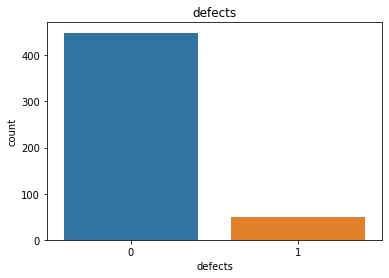

In [138]:
import seaborn as sns 
sns.countplot(data['defects']).set_title('defects')

In [139]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# pickle.dump(scaler, open('scaler.pickle', 'wb'))
# print(scaler.fit(data))

In [140]:
X= data.drop(['defects'], axis = 1) 
Y= data['defects']

In [141]:
# from sklearn.preprocessing import StandardScaler
# X = StandardScaler().fit_transform(X)# normalizing the feature


In [142]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(["defects"], axis=1), data["defects"],
                                                    random_state=10, test_size=0.25)

In [143]:
x_train.head()

,loc,g1,g2,g3,n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
212,31.0,5.0,1.0,5.0,141.0,734.53,0.06,16.56,44.36,12163.87,...,675.77,5,0,10,0,12.0,25.0,72.0,69.0,9.0
291,45.0,15.0,15.0,2.0,581.0,3190.77,0.01,95.66,33.36,305225.84,...,16956.99,1,16,9,0,23.0,22.0,398.0,183.0,29.0
260,29.0,6.0,1.0,6.0,133.0,707.82,0.04,24.00,29.49,16987.59,...,943.76,7,3,5,0,20.0,20.0,85.0,48.0,8.0
483,32.0,4.0,1.0,4.0,117.0,574.11,0.04,22.75,25.24,13060.92,...,725.61,0,4,17,0,14.0,16.0,65.0,52.0,5.0
70,32.0,3.0,1.0,1.0,538.0,3124.36,0.02,53.20,58.73,166215.79,...,9234.21,3,13,22,0,16.0,40.0,272.0,266.0,5.0


In [144]:
y_test.head()

388    0
249    0
398    0
305    0
146    0
Name: defects, dtype: int64

In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [146]:
logit = LogisticRegression()
logit.fit(x_train, y_train)

LogisticRegression()

In [147]:
logit_pred = logit.predict(x_test)

In [148]:
pickle.dump(logit, open('model1.pkl','wb'))


In [150]:
model = pickle.load(open('model1.pkl','rb'))
print(model.predict([[1.1,1.4,1.4,1.4,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.3,2,2,2,2,1.2,1.2,1.2,1.2,1.4]]))

[0]


In [79]:
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(logit_pred, name = 'Predict'), margins = True)

Predict,False,True,All
Actual,,,
False,26,2,28
True,1,0,1
All,27,2,29


In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, logit_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, logit_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, logit_pred)))

Accuracy is 0.86
Precision is 0.33
Recall is 0.21


In [81]:
# Data balancing applied using SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_sample(X, Y)
print('New dataset shape {}'.format(Counter(train_output_new)))

Original dataset shape Counter({False: 449, True: 49})
New dataset shape Counter({False: 449, True: 449})


In [82]:
train_input_new = pd.DataFrame(train_input_new, columns = list(X))

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)
logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression()

In [84]:
logit_pred = logit.predict(X_test)

In [85]:
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(logit_pred, name = 'Predict'), margins = True)

Predict,False,True,All
Actual,,,
False,19,9,28
All,19,9,28


In [86]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, logit_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, logit_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, logit_pred)))

accuracy_logit = accuracy_score(y_test, logit_pred)
precision_logit = precision_score(y_test, logit_pred)
recall_logit = recall_score(y_test, logit_pred)
auc_logit = roc_auc_score(y_test, logit_pred)

Accuracy is 0.76
Precision is 0.81
Recall is 0.71


In [87]:
##Decision treee

In [88]:
# Data balancing applied using SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(X, Y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(X))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({False: 449, True: 49})
New dataset shape Counter({False: 449, True: 449})


In [89]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_split=10)

In [90]:
dtree_pred = dtree.predict(X_test)

In [91]:
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(dtree_pred, name = 'Predict'), margins = True)

Predict,False,True,All
Actual,,,
False,12,16,28
All,12,16,28


In [92]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, dtree_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, dtree_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, dtree_pred)))
print("AUC is {0:.2f}".format(roc_auc_score(y_test, dtree_pred)))

accuracy_dtree = accuracy_score(y_test, dtree_pred)
precision_dtree = precision_score(y_test, dtree_pred)
recall_dtree = recall_score(y_test, dtree_pred)
auc_dtree = roc_auc_score(y_test, dtree_pred)

Accuracy is 0.84
Precision is 0.85
Recall is 0.85
AUC is 0.84


In [93]:
# # Create list of top most features based on importance
# feature_names = X_train.columns
# feature_imports = dtree.feature_importances_
# most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
# most_imp_features.sort_values(by="Importance", inplace=True)
# print(most_imp_features)
# plt.figure(figsize=(10,6))
# plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
# plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
# plt.xlabel('Importance')
# plt.title('Most important features - Decision Tree')
# plt.show()

In [94]:
### Random Forest

In [95]:

seed = 7

# Data balancing applied using SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(X, Y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(X))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=seed)

Original dataset shape Counter({False: 449, True: 49})
New dataset shape Counter({False: 449, True: 449})


In [96]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier(n_estimators = 20, max_depth=30, criterion = "gini", min_samples_split=10)
rm.fit(X_train, y_train) 

RandomForestClassifier(max_depth=30, min_samples_split=10, n_estimators=20)

In [97]:
rm_prd = rm.predict(X_test)

In [118]:
with open('rf.pkl', 'wb') as f:
    pickle.dump(rm, f)

In [119]:
with open('rf.pkl', 'rb') as f:
    clf_loaded = pickle.load(f)

In [122]:
clf_loaded.predict([1.1,1.4,1.4,1.4,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.3,2,2,2,2,1.2,1.2,1.2,1.2,1.4])

ValueError: Expected 2D array, got 1D array instead:
array=[1.1 1.4 1.4 1.4 1.3 1.3 1.3 1.3 1.3 1.3 1.3 1.3 2.  2.  2.  2.  1.2 1.2
 1.2 1.2 1.4].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [98]:
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(rm_prd, name = 'Predict'), margins = True)

Predict,False,True,All
Actual,,,
False,16,20,36
All,16,20,36


In [99]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, rm_prd)))
print("Precision is {0:.2f}".format(precision_score(y_test, rm_prd)))
print("Recall is {0:.2f}".format(recall_score(y_test, rm_prd)))
print("AUC is {0:.2f}".format(roc_auc_score(y_test, rm_prd)))

accuracy_rm = accuracy_score(y_test, rm_prd)
precision_rm = precision_score(y_test, rm_prd)
recall_rm = recall_score(y_test, rm_prd)
auc_rm = roc_auc_score(y_test, rm_prd)

Accuracy is 0.91
Precision is 0.92
Recall is 0.91
AUC is 0.90


In [100]:
###adaboost

In [101]:
# Data balancing applied using SMOTE
seed = 7

from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(X, Y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(X))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=seed)

Original dataset shape Counter({False: 449, True: 49})
New dataset shape Counter({False: 449, True: 449})


In [102]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators = 2000)

In [103]:
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=2000)

In [104]:
ada_pred = ada.predict(X_test)

In [105]:
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(ada_pred, name = 'Predict'), margins = True)

Predict,False,True,All
Actual,,,
False,17,19,36
All,17,19,36


In [106]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, ada_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, ada_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, ada_pred)))
print("AUC is {0:.2f}".format(roc_auc_score(y_test, ada_pred)))

accuracy_ada = accuracy_score(y_test, ada_pred)
precision_ada = precision_score(y_test, ada_pred)
recall_ada = recall_score(y_test, ada_pred)
auc_ada = roc_auc_score(y_test, ada_pred)

Accuracy is 0.91
Precision is 0.94
Recall is 0.90
AUC is 0.91


In [107]:
#XGBOOST

In [108]:
seed = 7
# test_size = 0.33
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


# Data balancing applied using SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(X, Y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(X))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=seed)

Original dataset shape Counter({False: 449, True: 49})
New dataset shape Counter({False: 449, True: 449})


In [109]:
# fit model no training data
model = XGBClassifier(n_estimators = 1500)
model.fit(X_train, y_train)

XGBClassifier(n_estimators=1500)

In [110]:

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [111]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, predictions)))
print("Precision is {0:.2f}".format(precision_score(y_test, predictions)))
print("Recall is {0:.2f}".format(recall_score(y_test, predictions)))
print("AUC is {0:.2f}".format(roc_auc_score(y_test, predictions)))

accuracy_xg = accuracy_score(y_test, predictions)
precision_xg = precision_score(y_test, predictions)
recall_xg = recall_score(y_test, predictions)
auc_xg = roc_auc_score(y_test, predictions)

Accuracy is 0.94
Precision is 0.96
Recall is 0.93
AUC is 0.94


In [112]:
pickle.dump(model, open('model.pickle', 'wb'))

In [113]:
### Model comparision

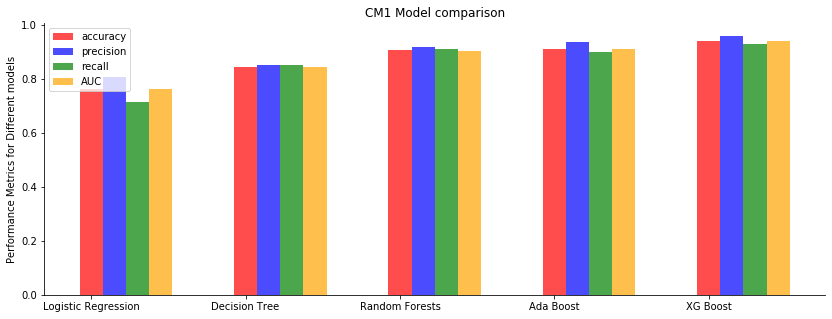

In [114]:
plt.figure(figsize=(14, 5))
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests', 'Ada Boost', 'XG Boost']
values = [accuracy_logit, accuracy_dtree, accuracy_rm, accuracy_ada,accuracy_xg]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'accuracy')
plt.xticks(model, models)
           

           
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests', 'Ada Boost', 'XG Boost']
values = [precision_logit, precision_dtree, precision_rm, precision_ada,precision_xg]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'blue', label = 'precision')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests', 'Ada Boost', 'XG Boost']
values = [recall_logit, recall_dtree, recall_rm, recall_ada,recall_xg]
model = np.arange(len(models))

plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'green', label = 'recall')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests', 'Ada Boost', 'XG Boost']
values = [auc_logit, auc_dtree, auc_rm, auc_ada,auc_xg]
model = np.arange(len(models))

plt.bar(model+0.45, values, align='center', width = 0.15, alpha=0.7, color = 'orange', label = 'AUC')
plt.xticks(model, models)



plt.ylabel('Performance Metrics for Different models')
plt.title('CM1 Model comparison')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()       